In [7]:
import sys
import warnings
sys.path.append('./data')
sys.path.append('./models')
from poidata import POIData
from divergence import Div
import pandas as pd
import spatial as sp
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings("ignore")

In [8]:
size = (8,8)
neighborhood_size=3

categories = set()  # Use a set to collect unique categories

# Loop through all the city names
for cn in ['coventry', 'birmingham']:
    data = pd.read_csv(f'input/poi/improved_poi_{cn}.csv')

    # Check if 'category' column exists
    if 'category' in data.columns:
        categories.update(data["category"].dropna().values)  # dropna to avoid NaNs

# Convert the set to a sorted list
categories = sorted(list(categories))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import entropy


d = Div()

def compute_jsd(P, Q, base=2):
    p = P.flatten().astype(float)
    q = Q.flatten().astype(float)
    p /= p.sum()
    q /= q.sum()
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m, base=base) + 0.5 * entropy(q, m, base=base)

In [9]:

poi = POIData(file_path='./input/poi/improved_poi_coventry.csv',
              shp_path='./input/geo/coventry/WD_DEC_2022_UK_BGC.shp',
              spacing_km=3)
poi.preprocess()
dest_tensor1,_,_ = poi.gen_features_grid(True, size,features_list=categories)


poi2 = POIData(file_path='./input/poi/improved_poi_birmingham.csv',
               shp_path='./input/geo/birmingham/WD_DEC_2022_UK_BGC.shp',
               spacing_km=4)
poi2.preprocess()

        
dest_tensor2,_,_= poi2.gen_features_grid(True, size, features_list=categories)



Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.05556910234777718, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 14)
Best bandwidth: (0.0039692215962697985, 0.02905811221104

In [25]:
dest_tensor1[:,:,0]

array([[1.92516290e-12, 1.36790265e-03, 5.66427948e-03, 2.34113425e-02,
        5.85283562e-03, 1.22631142e-02, 6.47885194e-03, 9.11935099e-04],
       [1.92516290e-12, 2.33472263e-01, 9.34232775e-01, 3.73476437e+00,
        1.31644667e+00, 2.04000554e+00, 1.04959911e+00, 1.43136683e-01],
       [1.92516290e-12, 5.29057951e+00, 1.69939615e+01, 5.11279948e+01,
        7.05603071e+01, 3.93928069e+01, 1.65599519e+01, 1.63882834e+00],
       [1.92516290e-12, 2.50781267e+01, 7.47135996e+01, 1.95500275e+02,
        3.89102523e+02, 1.73377353e+02, 6.67600478e+01, 5.66270741e+00],
       [1.92516290e-12, 1.82670978e+01, 5.43779046e+01, 1.42050503e+02,
        2.76135549e+02, 1.08049684e+02, 4.05111811e+01, 4.76581230e+00],
       [1.92516290e-12, 2.67685475e+00, 8.95798919e+00, 2.87540937e+01,
        4.84882735e+01, 1.64461283e+01, 6.05334259e+00, 1.08358045e+00],
       [1.92516290e-12, 1.76181778e-02, 2.44204454e-01, 1.67539452e+00,
        1.91127959e+00, 3.86137111e-01, 1.32643827e-01, 7.

In [10]:
d.compute(dest_tensor1[:,:,1], dest_tensor2[:,:,1])

(array([[0.        , 0.027119  , 0.13413671, 0.42528358, 0.02904296,
         0.1341367 , 0.027119  , 0.        ],
        [0.        , 0.0582292 , 0.01670309, 0.06917292, 0.1697524 ,
         0.05342742, 0.016291  , 0.        ],
        [0.027119  , 0.19466245, 0.12260034, 0.1697524 , 0.11111111,
         0.18726719, 0.12548954, 0.        ],
        [0.02072084, 0.35734464, 0.12453194, 0.18028403, 0.01726557,
         0.29011249, 0.13070134, 0.09002629],
        [0.02072084, 0.35734464, 0.34675416, 0.29139514, 0.08259375,
         0.12919044, 0.        , 0.36371066],
        [0.027119  , 0.19466245, 0.23371145, 0.34675416, 0.0582292 ,
         0.33333333, 0.0582292 , 0.09002629],
        [0.        , 0.016291  , 0.05342742, 0.05864128, 0.06917292,
         0.0582292 , 0.        , 0.        ],
        [0.        , 0.027119  , 0.09328462, 0.09195025, 0.10375937,
         0.        , 0.        , 0.        ]]),
 array([[2., 3., 3., 5., 3., 4., 3., 2.],
        [3., 4., 4., 4., 4., 4., 4.,

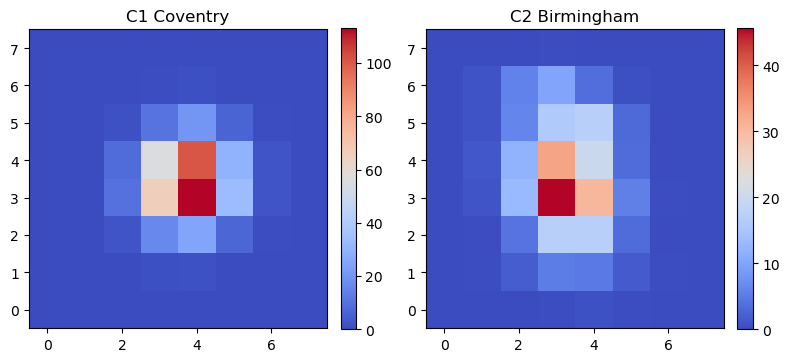

In [11]:
# Assume dest_tensor1 and dest_tensor2 are already defined
grid1 = dest_tensor1[:, :, 10]
grid2 = dest_tensor2[:, :, 10]

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Plot grid1
im1 = axs[0].imshow(grid1, origin='lower', cmap='coolwarm')
axs[0].set_title("C1 Coventry")
axs[0].grid(False)
plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

# Plot grid2
im2 = axs[1].imshow(grid2, origin='lower', cmap='coolwarm')
axs[1].set_title("C2 Birmingham")
axs[1].grid(False)
plt.colorbar(im2, ax=axs[0], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [12]:
cosine_similarity(grid1.flatten().reshape(1, -1), grid2.flatten().reshape(1, -1))

array([[0.82787749]])

In [13]:
global_jsd = compute_jsd(grid1, grid2)
local_jsd,a,b = d.compute(grid1, grid2)  # assuming this returns per-cell JSD map

In [14]:
# Choose the best window size and the bins
neighborhood_sizes =[3]
bin_counts = [16, 18, 20]
# bin_counts = [20]

height, width = grid1.shape
feature_best = []

In [15]:
categories

['business',
 'eatery',
 'education',
 'leisure',
 'financial',
 'historical',
 'industrial',
 'medical',
 'other',
 'public',
 'religious',
 'residential',
 'shopping',
 'transport']

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as colors
from scipy.stats import gaussian_kde

def normalize_to_01(data):
    """Normalize a numpy array to the range [0, 1]."""
    return (data - data.min()) / (data.max() - data.min())

def visualize_spatial_windows(grid1, grid2, bins1, bins2, position, window_size=(3, 3), observed_div=None, uii = 1, edgecolor='red'):
    (k, l) = position

    # Normalize each dataset separately (grid1, grid2, lisa1, lisa2)
    grid1_norm = normalize_to_01(grid1)
    grid2_norm = normalize_to_01(grid2)

    # Extract windows
    window1 = sp.get_window(grid1_norm, k, l)
    window2 = sp.get_window(grid2_norm, k, l)

    # Reverse the l and k because if the way JSD function access the index 0,0 from top,left
    jsd_window1 = sp.get_window(grid1_norm, l, k)
    jsd_window2 = sp.get_window(grid2_norm, l, k)

    # Create a common normalization for each row
    norm1 = colors.Normalize(vmin=0, vmax=1)  # For grid1 and window1
    norm2 = colors.Normalize(vmin=0, vmax=1)  # For grid2 and window2

    fig = plt.figure(figsize=(4, 9), constrained_layout=True)  # Modern layout management
    gs = gridspec.GridSpec(5, 2, height_ratios=[1, 1, 1, 1, 0.7], figure=fig)

    # === Grid 1 with highlighted cell ===
    ax0 = fig.add_subplot(gs[0, 0])
    im0 = ax0.imshow(grid1_norm, cmap='viridis', origin='lower', norm=norm1)
    rect0 = patches.Rectangle((k - 0.5, l - 0.5), 1, 1, linewidth=2, edgecolor=edgecolor, facecolor='none')
    ax0.add_patch(rect0)
    window_rect = patches.Rectangle(
        (k - window_size[0]//2 - 0.5, l - window_size[1]//2 - 0.5),
        window_size[1], window_size[0],
        linewidth=1, edgecolor='white', facecolor='none', linestyle='--'
    )
    ax0.add_patch(window_rect)
    ax0.set_title(f'a{uii}.1: Coventry {feature_name}\nCell ({k}, {l})\nμ: {grid1_norm.mean():.3f}, σ: {grid1_norm.std():.3f}')
    plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
    ax0.grid(False)

    # === Grid 2 with highlighted cell ===
    ax01 = fig.add_subplot(gs[0, 1])
    im01 = ax01.imshow(grid2_norm, cmap='viridis', origin='lower', norm=norm2)
    rect1 = patches.Rectangle((k - 0.5, l - 0.5), 1, 1, linewidth=2, edgecolor=edgecolor, facecolor='none')
    ax01.add_patch(rect1)
    window_rect2 = patches.Rectangle(
        (k - window_size[0]//2 - 0.5, l - window_size[1]//2 - 0.5),
        window_size[1], window_size[0],
        linewidth=1, edgecolor='white', facecolor='none', linestyle='--'
    )
    ax01.add_patch(window_rect2)
    ax01.set_title(f'a{uii}.2: Birmingham {feature_name}\nCell ({k}, {l})\nμ: {grid2_norm.mean():.3f}, σ: {grid2_norm.std():.3f}')
    # plt.colorbar(im01, ax=ax01, fraction=0.046, pad=0.04)
    ax01.grid(False)


    # === Window 1 ===
    ax1 = fig.add_subplot(gs[1, 0])
    # Use the same normalization as grid1
    im1 = ax1.imshow(window1, cmap='viridis', origin='lower', norm=norm1)
    ax1.set_title(f'b{uii}.1: Patch at ({k}, {l})')
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    ax1.set_xticks(np.arange(window_size[1]))
    ax1.set_yticks(np.arange(window_size[0]))
    for i in range(window_size[0]):
        for j in range(window_size[1]):
            # Show the original window values on top of the colored cells
            ax1.text(j, i, f"{window1[i, j]:.1f}", ha="center", va="center", color="w", fontsize=10, rotation=0)
    center_rect = patches.Rectangle(
        (window_size[1]//2 - 0.5, window_size[0]//2 - 0.5), 1, 1,
        linewidth=2, edgecolor=edgecolor, facecolor='none'
    )
    ax1.add_patch(center_rect)
    ax1.grid(False)

    # === Window 2 ===
    ax2 = fig.add_subplot(gs[1, 1])
    # Use the same normalization as grid2
    im2 = ax2.imshow(window2, cmap='viridis', origin='lower', norm=norm2)
    ax2.set_title(f'b{uii}.2: Patch at ({k}, {l})')
    # plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    ax2.set_xticks(np.arange(window_size[1]))
    ax2.set_yticks(np.arange(window_size[0]))
    for i in range(window_size[0]):
        for j in range(window_size[1]):
            # Show the original window values on top of the colored cells
            ax2.text(j, i, f"{window2[i, j]:.2f}", ha="center", va="center", color="w", fontsize=10)
    center_rect2 = patches.Rectangle(
        (window_size[1]//2 - 0.5, window_size[0]//2 - 0.5), 1, 1,
        linewidth=2, edgecolor=edgecolor, facecolor='none'
    )
    ax2.add_patch(center_rect2)
    ax2.grid(False)

    # === KDE & Histogram Plot ===
    ax5 = fig.add_subplot(gs[2, :])
    vals1 = jsd_window1.flatten()
    vals2 = jsd_window2.flatten()
    
    # Combine for bin range
    combined_vals = np.concatenate([vals1, vals2])
    hist_range = (combined_vals.min(), combined_vals.max())
    
    # Plot histograms with density=False to show counts
    n1, _, _ = ax5.hist(vals1, bins=int(bins1[i,j]), alpha=0.5, label='Patch 1',
                        color='blue', edgecolor='black')
    n2, _, _ = ax5.hist(vals2, bins=int(bins2[i,j]), alpha=0.5, label='Patch 2',
                        color='red', edgecolor='black')
    
    # Create a twin axis for the KDE
    ax5_twin = ax5.twinx()
    ax5_twin.set_yticks([])  # Hide the y-ticks for the KDE axis
    
    # KDE curve (for visual trend only)
    x = np.linspace(hist_range[0], hist_range[1], 100)
    
    try:
        kde1 = gaussian_kde(vals1)
        kde2 = gaussian_kde(vals2)
    
        # Get the maximum heights for scaling
        kde1_values = kde1(x)
        kde2_values = kde2(x)
    
        # Scale KDE to match histogram height range
        max_hist_height = max(np.max(n1), np.max(n2))
        scale_factor = max_hist_height / max(np.max(kde1_values), np.max(kde2_values))
    
        # Plot scaled KDE on twin axis
        ax5_twin.plot(x, kde1_values * scale_factor, color='darkblue', linewidth=1.5)
        ax5_twin.plot(x, kde2_values * scale_factor, color='darkred', linewidth=1.5)
    except Exception as e:
        print(f"KDE error: {e}")

    # Calculate and format the grid statistics for the title
    grid1_stats = f"Patch 1 - μ: {window1.mean():.2f}, σ: {window1.std():.2f}"
    grid2_stats = f"Patch 2 - μ: {window2.mean():.2f}, σ: {window2.std():.2f}"
    
    # Include the statistics in the title (using multiple lines)
    ax5.set_title(f"e{uii}: Local JSD: {observed_div[l, k]:.3f}\n{grid1_stats}\n{grid2_stats}")

    # ax5.set_xlabel("Normalized Patch")
    ax5.set_ylabel("Count")  # Y-axis now represents histogram counts
    ax5.legend()
    ax5.grid(True)


    return fig

In [17]:
i = 12
k,l= 5,4
edgecolor = 'red'
grid1 = dest_tensor1[:,:,i]
grid2 = dest_tensor2[:,:,i]
feature_name = categories[i]
print(categories[i])

shopping


In [19]:
best_bw = pd.read_csv('optimal_bandwidths.csv')

grid1_bw = best_bw[(best_bw['feature']==categories[i]) & (best_bw['city']=='coventry')][['optimal_bw1', 'optimal_bw2']].values
grid2_bw = best_bw[(best_bw['feature']==categories[i]) & (best_bw['city']=='birmingham')][['optimal_bw1', 'optimal_bw2']].values

FileNotFoundError: [Errno 2] No such file or directory: 'optimal_bandwidths.csv'

In [20]:
# results_df.to_csv('div_results.csv', index=False)
def local_global_jsd(grid1, grid2, method='tfidf_normalized_mean'):
    return tf_idf_style_dissimilarity(grid1, grid2, d)[method]
    global_jsd = compute_jsd(grid1, grid2)
    local_jsd,a,b = d.compute(grid1, grid2)  # assuming this returns per-cell JSD map
    local_jsd_mean = np.mean(local_jsd)

    # return 0 if global_jsd == 0 else local_jsd / np.log(1 / global_jsd)
    # return 0 if global_jsd == 0 else local_jsd_mean / np.log(1/ global_jsd)
    return 0 if global_jsd == 0 else local_jsd_mean / global_jsd

local_global_jsd(grid1, grid2)

NameError: name 'tf_idf_style_dissimilarity' is not defined

In [21]:
import numpy as np

def tf_idf_style_dissimilarity(grid1, grid2, d, epsilon=1e-8):
    """
    Compute a TF-IDF inspired aggregation of local and global dissimilarity.
    """

    # Global dissimilarity (entire grid comparison)
    global_jsd = compute_jsd(grid1, grid2)

    # Local dissimilarity map (per 3x3 patch)
    local_jsd, a, b = d.compute(grid1, grid2)  # Shape: (num_patches,)

    # TERM FREQUENCY: per-patch JSD (TF equivalent)
    tf = local_jsd  # Can be raw or normalized

    # INVERSE DOCUMENT FREQUENCY: rarity of dissimilarity (IDF equivalent)
    idf = -1 / np.log(global_jsd + epsilon)

    # Optionally normalize local JSDs (helps when values vary a lot)
    tf_normalized = tf / (np.max(tf) + epsilon)

    # Normalized TF * IDF mean
    tfidf_normalized_mean = np.mean(tf_normalized * idf)

    return {
        'tfidf_normalized_mean': tfidf_normalized_mean,
        'global_jsd': global_jsd,
        'idf': idf
    }
tf_idf_style_dissimilarity(grid1, grid2, d)
local_global_jsd(grid1, grid2, method='tfidf_normalized_mean')

0.17137481162039594

In [22]:
import numpy as np
import random

class GridGenerator:
    """Generate synthetic 8x8 grids with single or double spots"""

    def __init__(self, size=8):
        self.size = size

    def generate_empty_grid(self):
        """Generate an empty 8x8 grid filled with zeros"""
        return np.zeros((self.size, self.size), dtype=int)

    def generate_single_spot_grid(self):
        """Generate 8x8 grid with exactly one spot (value 1)"""
        grid = self.generate_empty_grid()

        # Random position for single spot
        row = random.randint(0, self.size - 1)
        col = random.randint(0, self.size - 1)
        grid[row, col] = 1

        return grid

    def generate_double_spot_grid(self):
        """Generate 8x8 grid with exactly two spots (value 1)"""
        grid = self.generate_empty_grid()

        # Generate two unique random positions
        positions = random.sample(range(self.size * self.size), 2)

        for pos in positions:
            row = pos // self.size
            col = pos % self.size
            grid[row, col] = 1

        return grid

    def print_grid(self, grid, title="Grid"):
        """Pretty print the grid"""
        print(f"\n{title}:")
        print("-" * (self.size * 4 + 1))
        for row in grid:
            print("|", end="")
            for cell in row:
                print(f" {cell} |", end="")
            print()
        print("-" * (self.size * 4 + 1))

    def grid_to_list(self, grid):
        """Convert numpy grid to Python list"""
        return grid.tolist()

    def get_spot_coordinates(self, grid):
        """Get coordinates of all spots (non-zero values)"""
        spots = np.where(grid == 1)
        return list(zip(spots[0], spots[1]))

def main():
    # Create generator instance
    generator = GridGenerator()

    print("=== Synthetic 8x8 Grid Generator ===")

    # Generate single spot grid
    single_grid = generator.generate_single_spot_grid()
    generator.print_grid(single_grid, "Single Spot Grid")

    single_coords = generator.get_spot_coordinates(single_grid)
    print(f"Spot coordinates: {single_coords}")
    print(f"Grid as list: {generator.grid_to_list(single_grid)}")

    # Generate double spot grid
    double_grid = generator.generate_double_spot_grid()
    generator.print_grid(double_grid, "Double Spot Grid")

    double_coords = generator.get_spot_coordinates(double_grid)
    print(f"Spot coordinates: {double_coords}")
    print(f"Grid as list: {generator.grid_to_list(double_grid)}")

    # Generate multiple examples
    print("\n=== Multiple Examples ===")

    print("\n5 Single Spot Grids:")
    for i in range(5):
        grid = generator.generate_single_spot_grid()
        coords = generator.get_spot_coordinates(grid)
        print(f"Grid {i+1}: Spot at {coords[0]}")

    print("\n5 Double Spot Grids:")
    for i in range(5):
        grid = generator.generate_double_spot_grid()
        coords = generator.get_spot_coordinates(grid)
        print(f"Grid {i+1}: Spots at {coords}")

# Alternative function-based approach (without class)
def generate_single_spot_grid_simple():
    """Simple function to generate single spot grid"""
    grid = [[0 for _ in range(8)] for _ in range(8)]
    row = random.randint(0, 7)
    col = random.randint(0, 7)
    grid[row][col] = 1
    return grid

def generate_double_spot_grid_simple():
    """Simple function to generate double spot grid"""
    grid = [[0 for _ in range(8)] for _ in range(8)]

    # Generate two unique positions
    positions = random.sample(range(64), 2)  # 64 = 8*8

    for pos in positions:
        row = pos // 8
        col = pos % 8
        grid[row][col] = 1

    return grid

def print_simple_grid(grid, title="Grid"):
    """Print grid using simple approach"""
    print(f"\n{title}:")
    for row in grid:
        print(" ".join(str(cell) for cell in row))

# Example usage of simple functions
print("\n=== Simple Function Examples ===")

# Single spot example
single = generate_single_spot_grid_simple()
print_simple_grid(single, "Simple Single Spot")

# Double spot example
double = generate_double_spot_grid_simple()
print_simple_grid(double, "Simple Double Spot")

local_global_jsd(single, double, method='tfidf_normalized_mean')


=== Simple Function Examples ===

Simple Single Spot:
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

Simple Double Spot:
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0


AttributeError: 'list' object has no attribute 'flatten'

business
eatery
education
leisure
financial
historical
industrial
medical
religious
shopping
transport


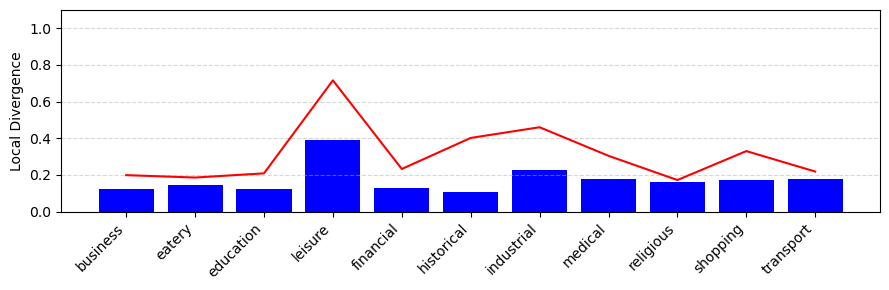

In [28]:
results = {}
cos_div_values = []
jsd_div_values = []
valid_categories = []
local_mean_values = []
cv1 = []
cv2 = []

# 'tfidf_mean': tfidf_mean,
# 'tfidf_normalized_mean': tfidf_normalized_mean,
# 'tfidf_weighted_mean': tfidf_weighted_mean,
# 'tfidf_weighted_normalized_mean': tfidf_weighted_normalized_mean,
i = 0
categories = sorted(categories)

for c in categories:
    if c in ['trips', 'distance', 'origins', 'other', 'residential', 'public']:
        i += 1
        continue
    print(c)
    
    if c == 'leisure':
        c  = 'leisure'
    grid1 = dest_tensor1[:, :, i]
    grid2 = dest_tensor2[:, :, i]

    mean1 = grid1.mean()
    mean2 = grid2.mean()

    std1 = grid1.std(ddof=0)
    std2 = grid2.std(ddof=0)

    cv1_val = std1 / mean1
    cv2_val = std2 / mean2

    cv1.append(cv1_val)
    cv2.append(cv2_val)

    # Compute cosine similarity and convert to divergence
    cos_div = cosine_similarity(grid1.flatten().reshape(1, -1),
                                grid2.flatten().reshape(1, -1))[0][0]
    cos_div = 1 - cos_div  # divergence measure

    jsd_div = local_global_jsd(grid1, grid2, method='tfidf_normalized_mean')
    local_jsd,a,b = d.compute(grid1, grid2)
    local_mean = np.mean(local_jsd)

    results[c] = {
        'feature': c,
        'observed_divergence': jsd_div,
        'cosine_similarity': cos_div
    }

    cos_div_values.append(cos_div)
    jsd_div_values.append(jsd_div)
    valid_categories.append(c)
    

    i += 1

# Plotting
plt.figure(figsize=(9, 3))
bars = plt.plot(valid_categories, cos_div_values, color='red')
bars = plt.bar(valid_categories, jsd_div_values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Local Divergence")
# plt.title("Cosine Divergence per Feature with CV1 and CV2")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(cos_div_values, jsd_div_values)

# Spearman correlation (rank-based, non-parametric)
spearman_corr, spearman_p = spearmanr(cos_div_values, jsd_div_values)

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3g}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3g}")

In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
np.random.seed(42)
grid_size = (20, 20)  # Spatial dimensions (expanded from 10x10)
num_features = 12     # Number of feature layers

# Grid 1: Structured/Geometric Pattern Grid
# Creates organized patterns with geometric structures
def create_structured_grid(grid_size, num_features):
    height, width = grid_size
    grid = np.zeros((*grid_size, num_features))

    for feature in range(num_features):
        # Create different geometric patterns for each feature
        for i in range(height):
            for j in range(width):
                if feature == 0:  # Concentric circles
                    center_dist = np.sqrt((i - height//2)**2 + (j - width//2)**2)
                    grid[i, j, feature] = np.sin(center_dist * np.pi / 3) * 0.5 + 0.5
                elif feature == 1:  # Diagonal stripes
                    grid[i, j, feature] = (i + j) % 3 / 2
                elif feature == 2:  # Checkerboard pattern
                    grid[i, j, feature] = (i + j) % 2
                elif feature == 3:  # Gradient from corner
                    grid[i, j, feature] = (i + j) / (height + width - 2)
                elif feature == 4:  # Wave pattern
                    grid[i, j, feature] = np.sin(i * np.pi / 4) * np.cos(j * np.pi / 4) * 0.5 + 0.5
                elif feature == 5:  # Vertical stripes
                    grid[i, j, feature] = (j % 4) / 3
                elif feature == 6:  # Horizontal stripes
                    grid[i, j, feature] = (i % 4) / 3
                elif feature == 7:  # Diamond pattern
                    diamond_dist = abs(i - height//2) + abs(j - width//2)
                    grid[i, j, feature] = (diamond_dist % 4) / 3
                elif feature == 8:  # Spiral pattern
                    angle = np.arctan2(i - height//2, j - width//2)
                    radius = np.sqrt((i - height//2)**2 + (j - width//2)**2)
                    grid[i, j, feature] = (np.sin(angle * 3 + radius) + 1) / 2
                elif feature == 9:  # Cross pattern
                    cross = min(abs(i - height//2), abs(j - width//2))
                    grid[i, j, feature] = 1 - (cross / max(height//2, width//2))
                elif feature == 10:  # Triangular waves
                    tri_wave = abs((i + j) % 6 - 3) / 3
                    grid[i, j, feature] = tri_wave
                else:  # Hexagonal tiling pattern
                    hex_x = j + 0.5 * (i % 2)
                    hex_y = i * 0.866
                    grid[i, j, feature] = (int(hex_x) + int(hex_y)) % 2

    return grid

# Grid 2: Organic/Random Pattern Grid  
# Creates natural, irregular patterns with clustering
def create_organic_grid(grid_size, num_features):
    height, width = grid_size
    grid = np.zeros((*grid_size, num_features))

    for feature in range(num_features):
        # Create organic patterns with different characteristics
        if feature == 0:  # Perlin-like noise simulation
            base = np.random.rand(height, width)
            # Apply smoothing filter multiple times
            for _ in range(3):
                smoothed = np.zeros_like(base)
                for i in range(1, height-1):
                    for j in range(1, width-1):
                        smoothed[i, j] = np.mean(base[i-1:i+2, j-1:j+2])
                base = smoothed
            grid[:, :, feature] = base

        elif feature == 1:  # Clustered random values
            # Create random clusters
            centers = [(np.random.randint(0, height), np.random.randint(0, width))
                       for _ in range(3)]
            for i in range(height):
                for j in range(width):
                    # Distance to nearest cluster center
                    min_dist = min(np.sqrt((i-ci)**2 + (j-cj)**2) for ci, cj in centers)
                    grid[i, j, feature] = np.exp(-min_dist/3) + np.random.normal(0, 0.1)

        elif feature == 2:  # Spiky/irregular values
            grid[:, :, feature] = np.random.exponential(0.3, grid_size)

        elif feature == 3:  # Sparse high values
            sparse_mask = np.random.rand(*grid_size) < 0.2
            grid[:, :, feature] = sparse_mask * np.random.rand(*grid_size)

        elif feature == 4:  # Fractal-like recursive pattern
            scale = 1
            for level in range(3):
                freq = 2**level
                amplitude = 1 / (2**level)
                for i in range(height):
                    for j in range(width):
                        grid[i, j, feature] += amplitude * np.sin(i * freq * np.pi / height) * \
                                               np.cos(j * freq * np.pi / width)
            grid[:, :, feature] = (grid[:, :, feature] + 1) / 2  # Normalize to [0,1]

        elif feature == 5:  # Cellular automata-like pattern
            # Start with random seed
            automata = np.random.rand(*grid_size) > 0.6
            # Apply simple rule: cell survives if 2-3 neighbors, born if exactly 3
            for generation in range(3):
                new_automata = np.zeros_like(automata)
                for i in range(1, height-1):
                    for j in range(1, width-1):
                        neighbors = np.sum(automata[i-1:i+2, j-1:j+2]) - automata[i, j]
                        if automata[i, j]:
                            new_automata[i, j] = neighbors in [2, 3]
                        else:
                            new_automata[i, j] = neighbors == 3
                automata = new_automata
            grid[:, :, feature] = automata.astype(float)

        elif feature == 6:  # Voronoi-like regions
            # Random seed points
            seeds = [(np.random.randint(0, height), np.random.randint(0, width))
                     for _ in range(4)]
            for i in range(height):
                for j in range(width):
                    distances = [np.sqrt((i-si)**2 + (j-sj)**2) for si, sj in seeds]
                    closest = np.argmin(distances)
                    grid[i, j, feature] = (closest + np.random.normal(0, 0.1)) / len(seeds)

        elif feature == 7:  # Erosion-like pattern
            # Start with height map
            heights = np.random.rand(*grid_size)
            # Simulate erosion
            for _ in range(5):
                new_heights = heights.copy()
                for i in range(1, height-1):
                    for j in range(1, width-1):
                        # Flow to lowest neighbor
                        neighbors = heights[i-1:i+2, j-1:j+2]
                        if heights[i, j] > np.min(neighbors):
                            erosion = (heights[i, j] - np.min(neighbors)) * 0.1
                            new_heights[i, j] -= erosion
                heights = new_heights
            grid[:, :, feature] = heights

        elif feature == 8:  # Bubble/blob pattern
            # Multiple overlapping circular regions
            for _ in range(6):
                center_i, center_j = np.random.randint(0, height), np.random.randint(0, width)
                radius = np.random.uniform(1, 4)
                intensity = np.random.uniform(0.3, 0.8)
                for i in range(height):
                    for j in range(width):
                        dist = np.sqrt((i - center_i)**2 + (j - center_j)**2)
                        if dist < radius:
                            grid[i, j, feature] += intensity * np.exp(-dist**2 / radius)

        elif feature == 9:  # Lightning/branching pattern
            # Start from random points and branch
            branch_points = [(np.random.randint(0, height), np.random.randint(0, width))
                             for _ in range(2)]
            for start_i, start_j in branch_points:
                current_i, current_j = start_i, start_j
                intensity = 1.0
                for step in range(15):
                    if 0 <= current_i < height and 0 <= current_j < width:
                        grid[current_i, current_j, feature] = max(grid[current_i, current_j, feature], intensity)
                        # Random walk with bias
                        di, dj = np.random.choice([-1, 0, 1], 2)
                        current_i += di
                        current_j += dj
                        intensity *= 0.8

        elif feature == 10:  # Swirl/vortex pattern
            center_i, center_j = height//2, width//2
            for i in range(height):
                for j in range(width):
                    dx, dy = j - center_j, i - center_i
                    angle = np.arctan2(dy, dx)
                    radius = np.sqrt(dx**2 + dy**2)
                    swirl = np.sin(angle * 3 + radius * 0.5) * np.exp(-radius/4)
                    grid[i, j, feature] = (swirl + 1) / 2

        else:  # Turbulent flow pattern
            # Simulate turbulent flow with multiple vortices
            vortex_centers = [(np.random.uniform(0, height), np.random.uniform(0, width))
                              for _ in range(3)]
            for i in range(height):
                for j in range(width):
                    flow_intensity = 0
                    for vc_i, vc_j in vortex_centers:
                        dist = np.sqrt((i - vc_i)**2 + (j - vc_j)**2) + 0.1
                        flow_intensity += 1 / dist * np.sin(dist * 2)
                    grid[i, j, feature] = (np.tanh(flow_intensity) + 1) / 2

    # Ensure values are in valid range
    grid = np.clip(grid, 0, 1)
    return grid

# Generate the two different grids
dest_tensor1 = create_structured_grid(grid_size, num_features)  # Geometric/structured
dest_tensor2 = create_organic_grid(grid_size, num_features)     # Organic/random

# Visualization function
def visualize_grids(grid1, grid2):
    fig, axes = plt.subplots(2, num_features, figsize=(24, 6))
    fig.suptitle('Comparison of Two Semantically Different Grids (12 Features)', fontsize=16)

    for feature in range(num_features):
        # Plot structured grid
        im1 = axes[0, feature].imshow(grid1[:, :, feature], cmap='viridis', vmin=0, vmax=1)
        axes[0, feature].set_title(f'Structured\nF{feature}', fontsize=8)
        axes[0, feature].axis('off')

        # Plot organic grid
        im2 = axes[1, feature].imshow(grid2[:, :, feature], cmap='viridis', vmin=0, vmax=1)
        axes[1, feature].set_title(f'Organic\nF{feature}', fontsize=8)
        axes[1, feature].axis('off')

    plt.tight_layout()
    plt.show()

# Statistical comparison
def compare_grids(grid1, grid2):
    print("GRID COMPARISON ANALYSIS")
    print("=" * 50)

    for feature in range(num_features):
        layer1 = grid1[:, :, feature]
        layer2 = grid2[:, :, feature]

        print(f"\nFeature {feature}:")
        print(f"  Structured Grid - Mean: {layer1.mean():.3f}, Std: {layer1.std():.3f}")
        print(f"  Organic Grid    - Mean: {layer2.mean():.3f}, Std: {layer2.std():.3f}")

        # Calculate spatial autocorrelation (measure of pattern regularity)
        def spatial_autocorr(arr):
            center = arr[1:-1, 1:-1]
            neighbors = (arr[:-2, 1:-1] + arr[2:, 1:-1] +
                         arr[1:-1, :-2] + arr[1:-1, 2:]) / 4
            return np.corrcoef(center.flatten(), neighbors.flatten())[0, 1]

        autocorr1 = spatial_autocorr(layer1)
        autocorr2 = spatial_autocorr(layer2)

        print(f"  Spatial Autocorrelation - Structured: {autocorr1:.3f}, Organic: {autocorr2:.3f}")

# Run the analysis
print("Generating two semantically different grids...")
print(f"Grid dimensions: {grid_size} with {num_features} features each")
print(f"Grid 1 shape: {dest_tensor1.shape}")
print(f"Grid 2 shape: {dest_tensor2.shape}")

compare_grids(dest_tensor1, dest_tensor2)

# Visualize the results
visualize_grids(dest_tensor1, dest_tensor2)

print("\nKEY DIFFERENCES:")
print("STRUCTURED GRID (Mathematical/Geometric):")
print("  F0: Concentric circles    F1: Diagonal stripes     F2: Checkerboard")
print("  F3: Corner gradient       F4: Wave interference    F5: Vertical stripes")
print("  F6: Horizontal stripes    F7: Diamond pattern      F8: Spiral pattern")
print("  F9: Cross pattern         F10: Triangular waves    F11: Hexagonal tiling")
print("\nORGANIC GRID (Natural/Complex):")
print("  F0: Perlin noise          F1: Clustered regions    F2: Exponential spikes")
print("  F3: Sparse resources      F4: Fractal patterns     F5: Cellular automata")
print("  F6: Voronoi regions       F7: Erosion simulation   F8: Bubble/blob pattern")
print("  F9: Lightning branches    F10: Swirl/vortex        F11: Turbulent flow")

In [ ]:
categories = ['f' + str(i) for i in range(num_features)]

In [ ]:
combined_divergence_values = []
cosine_similarity_values = []
valid_categories = []
results = {}

# Assuming categories is a list of category names corresponding to tensor slices
i = 0
for i in range(dest_tensor1.shape[1]):  # iterate over 3rd dimension slices
    for j in range(dest_tensor1.shape[2]):
        c = 'c' + str(i) + str(j)
    
        grid1 = dest_tensor1[:, :, i]
        grid2 = dest_tensor2[:, :, j]
    
        combined_metric = local_global_jsd(grid1, grid2, method='tfidf_normalized_mean')
    
        cos_sim = cosine_similarity(
            grid1.flatten().reshape(1, -1),
            grid2.flatten().reshape(1, -1)
        )[0][0]
        cos_sim = 1 - cos_sim  # divergence measure
    
        print(f"Combined Divergence for {c}: {combined_metric:.4f}")
    
        results[c] = {
            'feature': c,
            'observed_divergence': combined_metric,
            'cosine_similarity': cos_sim
        }
    
        combined_divergence_values.append(combined_metric)
        cosine_similarity_values.append(cos_sim)
        valid_categories.append(c)


In [ ]:
# Plotting with dual axes
fig, ax1 = plt.subplots(figsize=(30, 3))

# Bar plot for JSD
bars = ax1.bar(valid_categories, combined_divergence_values, color='blue', label='Local/Global JSD')
ax1.set_ylabel("Local/Global JSD", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin axis for cosine similarity
ax2 = ax1.twinx()
ax2.plot(valid_categories, cosine_similarity_values, color='red', linewidth=1, label='Cosine divergence')
ax2.set_ylabel("Cosine divergence", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1.05)

# Title and layout
plt.title("Per-Feature Local/Global JSD and Cosine divergence (1 - Cosine Similarity)")
ax1.set_xticklabels(valid_categories, rotation=90, ha='right')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
len(combined_divergence_values)

In [ ]:
# Pearson: linear correlation
pearson_corr, p_pearson = pearsonr(combined_divergence_values, cosine_similarity_values)

# Spearman: rank-based correlation
spearman_corr, p_spearman = spearmanr(combined_divergence_values, cosine_similarity_values)

print(f"Pearson correlation: {pearson_corr:.3f} (p={p_pearson:.3g})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={p_spearman:.3g})")


In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(combined_divergence_values, cosine_similarity_values,
            color='purple', alpha=0.7, edgecolors='black')
plt.title("Scatter Plot: JSD vs Cosine Divergence")
plt.xlabel("Local/Global JSD")
plt.ylabel("Cosine Divergence")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
grid1 = dest_tensor1[:,:,1]
grid2 = dest_tensor2[:,:,1]
combined_metric = local_global_jsd(grid1, grid2, method='tfidf_normalized_mean')
combined_metric

In [ ]:
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
from tqdm import tqdm


def permutation_test(grid1, grid2, n_permutations=1000, local_weight=0.5, global_weight=0.5):
    """
    Perform permutation test to assess statistical significance of the difference between two grids.
    
    Parameters:
    grid1, grid2: 2D arrays to compare
    n_permutations: number of permutations to perform
    local_weight, global_weight: weights for local and global comparisons
    
    Returns:
    dict with test results
    """
    # Calculate observed test statistic
    observed_stat = local_global_jsd(grid1, grid2, method='tfidf_normalized_mean')

    # Combine the data
    combined_data = np.concatenate([grid1.flatten(), grid2.flatten()])
    n1, n2 = grid1.size, grid2.size

    # Store permutation statistics
    perm_stats = []

    print(f"Running permutation test with {n_permutations} permutations...")

    for i in tqdm(range(n_permutations)):
        # Randomly shuffle the combined data
        perm_grid2 = np.random.permutation(grid2)

        # Split back into two groups of original sizes
        # perm_grid1 = combined_data[:n1].reshape(grid1.shape)
        # perm_grid2 = combined_data[n1:n1+n2].reshape(grid2.shape)

        # Calculate test statistic for this permutation
        perm_stat = local_global_jsd(grid1, perm_grid2.reshape(grid2.shape))
        perm_stats.append(perm_stat)

    perm_stats = np.array(perm_stats)

    # Calculate p-value
    # For JSD, larger values indicate more difference, so we want P(perm_stat >= observed_stat)
    p_value = np.mean(perm_stats >= observed_stat)

    # Calculate effect size (standardized difference)
    effect_size = (observed_stat - np.mean(perm_stats)) / np.std(perm_stats)

    results = {
        'observed_statistic': observed_stat,
        'p_value': p_value,
        'effect_size': effect_size,
        'permutation_stats': perm_stats,
        'mean_null': np.mean(perm_stats),
        'std_null': np.std(perm_stats),
        'n_permutations': n_permutations
    }

    return results

In [ ]:
def plot_permutation_results(results):
    """
    Plot the results of the permutation test.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram of permutation statistics
    ax1.hist(results['permutation_stats'], bins=50, alpha=0.7, density=True, color='lightblue')
    ax1.axvline(results['observed_statistic'], color='red', linestyle='--', linewidth=2,
                label=f'Observed: {results["observed_statistic"]:.4f}')
    ax1.axvline(results['mean_null'], color='black', linestyle='-', alpha=0.5,
                label=f'Null mean: {results["mean_null"]:.4f}')
    ax1.set_xlabel('Test Statistic (Combined JSD)')
    ax1.set_ylabel('Density')
    ax1.set_title('Permutation Test Results')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # P-value visualization
    perm_stats = results['permutation_stats']
    observed = results['observed_statistic']

    ax2.hist(perm_stats, bins=50, alpha=0.7, density=True, color='lightblue')
    ax2.hist(perm_stats[perm_stats >= observed], bins=50, alpha=0.7, density=True,
             color='red', label=f'P-value region')
    ax2.axvline(observed, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('Test Statistic (Combined JSD)')
    ax2.set_ylabel('Density')
    ax2.set_title(f'P-value = {results["p_value"]:.4f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
def interpret_results(results, alpha=0.05):
    """
    Interpret the permutation test results.
    """
    print("=" * 60)
    print("PERMUTATION TEST RESULTS")
    print("=" * 60)
    print(f"Observed test statistic: {results['observed_statistic']:.6f}")
    print(f"P-value: {results['p_value']:.6f}")
    print(f"Effect size (Cohen's d): {results['effect_size']:.4f}")
    print(f"Number of permutations: {results['n_permutations']}")
    print()

    # Statistical significance
    if results['p_value'] < alpha:
        print(f"✓ SIGNIFICANT at α = {alpha}")
        print("  The observed difference is statistically significant.")
        print("  The two grids are significantly different from each other.")
    else:
        print(f"✗ NOT SIGNIFICANT at α = {alpha}")
        print("  The observed difference could reasonably be due to chance.")
        print("  Cannot conclude that the grids are significantly different.")

    print()

    # Effect size interpretation
    abs_effect = abs(results['effect_size'])
    if abs_effect < 0.2:
        effect_magnitude = "negligible"
    elif abs_effect < 0.5:
        effect_magnitude = "small"
    elif abs_effect < 0.8:
        effect_magnitude = "medium"
    else:
        effect_magnitude = "large"

    print(f"Effect size interpretation: {effect_magnitude} effect")
    print()

    # Null distribution summary
    print("Null distribution summary:")
    print(f"  Mean: {results['mean_null']:.6f}")
    print(f"  Std:  {results['std_null']:.6f}")
    print(f"  Range: [{np.min(results['permutation_stats']):.6f}, {np.max(results['permutation_stats']):.6f}]")
    
# Run permutation test
results = permutation_test(grid1, grid2, n_permutations=999)

# Interpret and visualize results
interpret_results(results)
plot_permutation_results(results)

print("\nTo use with your actual data:")
print("grid1 = dest_tensor1[:,:,1]")
print("grid2 = dest_tensor2[:,:,1]")
print("results = permutation_test(grid1, grid2, n_permutations=1000)")
print("interpret_results(results)")
print("plot_permutation_results(results)")